In [71]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from eval_util import make_compare_plot,plot_cdf,plot_pdf,make_prediction_diff,make_prediction,DCR, hitting_rate, make_clustering,convert_type
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import numpy
from tqdm import tqdm
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import os
import glob
%matplotlib inline

In [21]:
def plot_pdf(data,label,bin=10):
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)

    plt.plot(bins_count[1:], pdf, label=label)

def plot_cdf(data,label,bin=10):
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label=label)

def make_compare_plot(datasets,col_name, function, names, title, dataset, additional=""):
    for i in range(len(datasets)):
        data = datasets[i]
        function(data[col_name],names[i])
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.savefig("evaluation_result/{}/{}_{}.png".format(dataset,title,additional))
    plt.show()



In [4]:
selgan

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.172813,-0.123982,-3.345182,-1.653773,1.688639,-2.458139,2.127924,1.456336,0.699659,-0.949800,...,0.762354,-3.120737,-0.424617,0.365405,-0.713552,-0.362477,0.659224,0.511034,29.141084,0
1,1.512197,0.802586,-0.436846,5.723805,1.090113,0.427310,-17.978739,1.859605,-0.065340,-0.586489,...,0.805406,-1.374210,0.427946,-0.350460,-0.127204,0.117489,0.014899,-0.203147,-18.107756,1
2,-2.354335,-5.024021,2.780914,-3.730548,-1.479405,0.758501,13.111689,0.873992,-4.010757,1.481806,...,0.910164,2.057563,0.552115,0.007414,-1.233163,0.201386,-0.659980,-0.019145,181.839330,0
3,4.147777,2.377377,-2.203827,4.611769,1.722337,-2.526482,-0.863141,0.780445,-1.343376,-1.432385,...,0.801600,0.208458,-0.169345,-1.845685,-0.662484,-0.147782,-0.588256,-0.531453,16.467318,1
4,1.208875,1.560115,-0.500952,-0.624064,-1.497396,0.106158,-0.619477,0.837874,0.939193,0.204520,...,0.792921,-0.427746,0.307752,0.951377,0.954312,-0.731403,0.202885,0.112571,32.036998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14235,2.243515,0.916097,-0.751866,-1.280157,-1.596131,-2.463276,0.425302,-0.387439,-1.138057,0.565280,...,-0.014051,1.522707,-0.791239,2.196460,-0.797491,0.191647,-0.602738,-0.127781,-31.747136,0
14236,1.888857,-1.181668,-4.481364,1.627068,1.168927,-2.526390,-3.724820,1.569487,-0.635399,7.407119,...,0.975730,-0.000966,-3.094211,-0.157234,0.329238,-0.057790,-1.011458,-0.204117,14.514356,1
14237,-7.646200,1.047629,-2.836780,-0.812248,-2.274342,1.153385,0.481102,0.873996,0.730619,-3.928331,...,0.807827,1.931877,0.243562,-0.705401,-0.339584,0.358242,0.128488,-1.759301,104.506395,1
14238,0.555080,4.627204,1.217172,4.927691,1.547196,-7.961702,-14.913917,-0.126407,0.983516,-3.414217,...,2.680633,2.053745,-0.299702,0.172258,-0.136831,-0.727375,1.478803,0.510959,3.231837,1


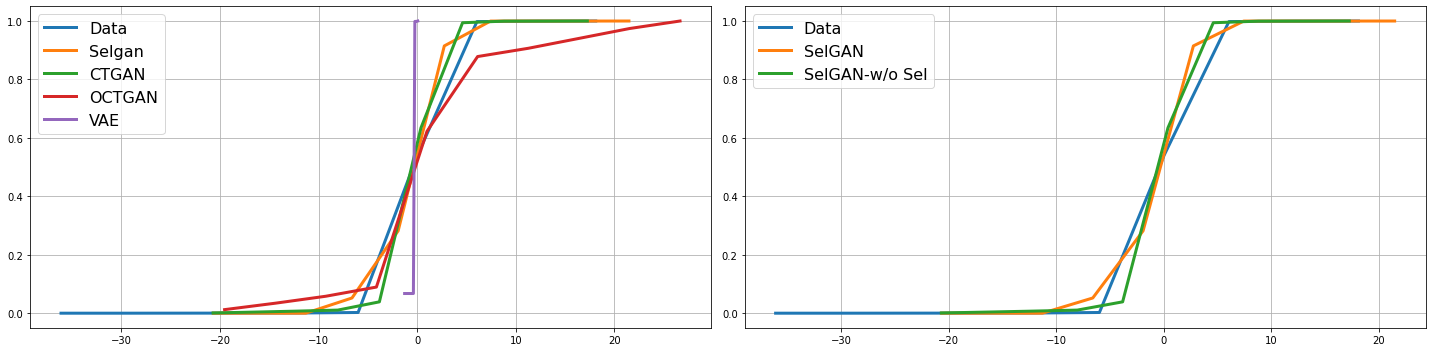

In [10]:
import matplotlib.font_manager as font_manager

column_name = "V5"
datasetleft = [data_origin, selgan, ctgan, octgan, VAE]
datanameleft = ["Data", "Selgan","CTGAN", "OCTGAN", "VAE"]
datasetright = [data_origin, selgan, ctgan]
datanameright = ["Data", "SelGAN", "SelGAN-w/o Sel"]

fig, (axs1,axs2) = plt.subplots(1,2, figsize = (20,5))

font = font_manager.FontProperties(
                                   #family='Comic Sans MS',
                                   #weight='bold',
                                   #style='normal', 
                                    size=16)


for i in range(len(datasetleft)):
    data = datasetleft[i][column_name]
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    axs1.plot(bins_count[1:], cdf, label=datanameleft[i],linewidth=3)

for i in range(len(datasetright)):
    data = datasetright[i][column_name]
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    axs2.plot(bins_count[1:], cdf, label=datanameright[i],linewidth=3)
    
axs1.legend(prop=font)
axs1.grid()
axs2.legend(prop=font)
axs2.grid()
fig.tight_layout()
        
    
# plt.subplots_adjust(left=0.1,
#                     bottom = 0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.2, 
#                     hspace=0.1)

plt.savefig("evaluation_result/{}/CDF_{}.png".format(dataname,column_name))

In [72]:
dataname = "credit"
datapath = "dataset"
generated = "{}/generated/{}/".format(datapath,dataname)


data_origin = pd.read_csv("{}/origin/{}.csv".format(datapath,dataname))

#datalist = ["ctgan","tablegan","octgan","VAE","KL_daisy","sel_daisy","sm_daisy","selgan"]


ctgan = pd.read_csv("{}/generated/{}/ctgan/ctgan_less_300.csv".format(datapath,dataname))

if (dataname =="adult") or  (dataname =="credit"):
    tablegan = pd.read_csv("{}/generated/{}/tablegan/tablegan_{}_fake.csv".format(datapath,dataname,dataname))

if not dataname == "ticket":
    octgan = pd.read_csv("{}/generated/{}/octgan/octgan_{}_less.csv".format(datapath,dataname,dataname))
    
VAE = pd.read_csv("{}/generated/{}/VAE/sample_data_vae_800_0.csv".format(datapath,dataname,dataname)).set_axis(data_origin.columns, axis=1, inplace=False)
#VAE = pd.read_csv("{}/generated/{}/ctgan/tvae_200.csv".format(datapath,dataname))


selgan = pd.read_csv("{}/generated/{}/selgan/selgan_300_full_batch.csv".format(datapath,dataname))


KL_daisy = pd.read_csv("{}/generated/{}/KL/KL_1_800_0.csv".format(datapath,dataname,dataname))
sel_daisy = pd.read_csv("{}/generated/{}/sel/sel_1_800_0.csv".format(datapath,dataname,dataname))
sm_daisy = pd.read_csv("{}/generated/{}/sel_mean/sel_mean_1_800_0.csv".format(datapath,dataname,dataname))



In [5]:
save_path = "evaluation_result/{}".format(dataname)
try:
    os.mkdir(save_path)
except:
    pass

In [14]:
def mode_collapse(datalist,namelist):
    for i in range(len(datalist)):
        data = datalist[i]
        name = namelist[i]
        print(name, (data.shape[0] - data.drop_duplicates().shape[0])/(data.shape[0])*100)

mode_collapse([ctgan,selgan,tablegan,octgan,VAE],["ctgan","selgan","tablegan","octgan","VAE"])

ctgan 0.0
selgan 0.0
tablegan 0.0
octgan 0.0
VAE 84.8314606741573


In [15]:
VAE

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.134735,0.255759,0.847624,1.595467,-0.250729,0.010103,-0.196995,-0.024143,1.687051,-0.537074,...,-0.386787,-0.66859,0.076859,0.007211,0.396907,-0.539688,0.02797,0.020176,101.04660,0
1,1.134735,0.255759,0.847624,1.595467,-0.250729,0.010103,-0.196995,-0.024143,1.687051,-0.537074,...,-0.386787,-0.66859,0.076859,0.007211,0.396907,-0.539688,0.02797,0.020176,101.04660,0
2,1.134735,0.255759,0.847624,1.595467,-0.250729,0.010103,-0.196995,-0.024143,1.687051,-0.537074,...,-0.386787,-0.66859,0.076859,0.007211,0.396907,-0.539688,0.02797,0.020176,101.04662,0
3,1.134735,0.255759,0.847624,1.595467,-0.250729,0.010103,-0.196995,-0.024143,1.687051,-0.537074,...,-0.386787,-0.66859,0.076859,0.007211,0.396907,-0.539688,0.02797,0.020176,101.04660,0
4,1.134735,0.255759,0.847624,1.595467,-0.250729,0.010103,-0.196995,-0.024143,1.687051,-0.537074,...,-0.386787,-0.66859,0.076859,0.007211,0.396907,-0.539688,0.02797,0.020176,101.04660,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.134735,0.255759,0.847624,1.595467,-0.250729,0.010103,-0.196995,-0.024143,1.687051,-0.537074,...,-0.386787,-0.66859,0.076859,0.007211,0.396907,-0.539688,0.02797,0.020176,101.04660,0
708,1.134735,0.255759,0.847624,1.595467,-0.250729,0.010103,-0.196995,-0.024143,1.687051,-0.537074,...,-0.386787,-0.66859,0.076859,0.007211,0.396907,-0.539688,0.02797,0.020176,101.04660,0
709,1.134735,0.255759,0.847624,1.595467,-0.250729,0.010103,-0.196995,-0.024143,1.687051,-0.537074,...,-0.386787,-0.66859,0.076859,0.007211,0.396907,-0.539688,0.02797,0.020176,101.04660,0
710,1.134735,0.255759,0.847624,1.595467,-0.250729,0.010103,-0.196995,-0.024143,1.687051,-0.537074,...,-0.386787,-0.66859,0.076859,0.007211,0.396907,-0.539688,0.02797,0.020176,101.04660,0


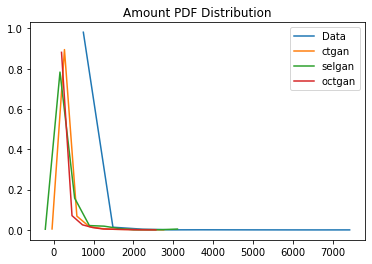

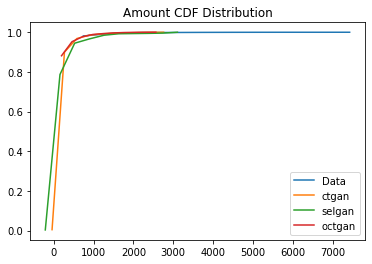

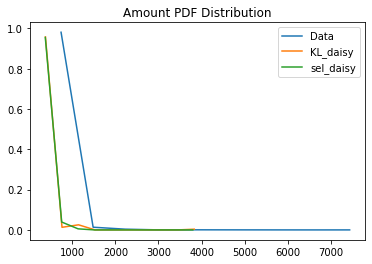

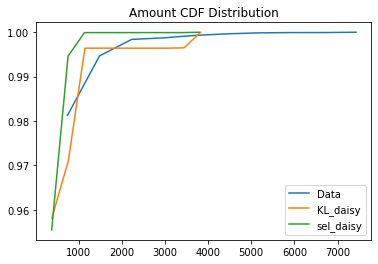

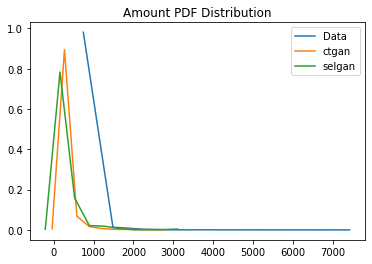

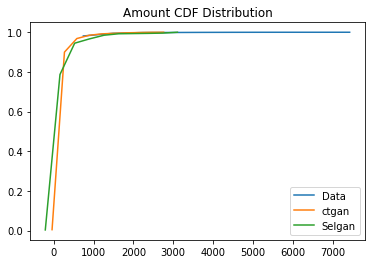

In [20]:
column_name = "Amount"

make_compare_plot([data_origin,ctgan,selgan, octgan],column_name,
plot_pdf,["Data", "ctgan","selgan", "octgan"],"{} PDF Distribution".format(column_name),dataname,"full")
make_compare_plot([data_origin,ctgan, selgan, octgan],column_name,
plot_cdf,["Data", "ctgan","selgan", "octgan"],"{} CDF Distribution".format(column_name),dataname,"full")

make_compare_plot([data_origin, KL_daisy, sel_daisy],column_name,
plot_pdf,["Data", "KL_daisy", "sel_daisy"],"{} PDF Distribution".format(column_name),dataname,"Daisy")
make_compare_plot([data_origin, KL_daisy, sel_daisy],column_name,
plot_cdf,["Data", "KL_daisy", "sel_daisy"],"{} CDF Distribution".format(column_name),dataname,"Daisy")

make_compare_plot([data_origin, ctgan, selgan],column_name,
plot_pdf,["Data", "ctgan", "selgan"],"{} PDF Distribution".format(column_name),dataname,"selgan")
make_compare_plot([data_origin, ctgan, selgan],column_name,
plot_cdf,["Data", "ctgan", "Selgan"],"{} CDF Distribution".format(column_name),dataname,"selgan")

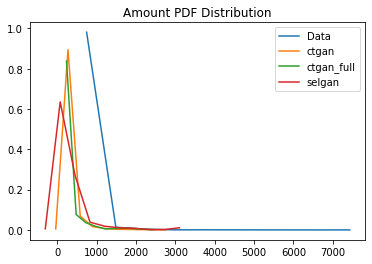

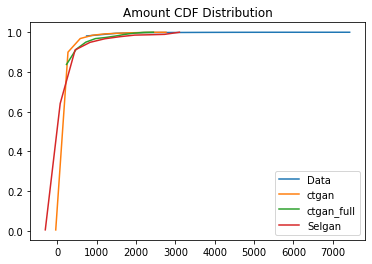

In [20]:
column_name = "Amount"
make_compare_plot([data_origin, ctgan,ctgan_full, selgan],column_name,
plot_pdf,["Data", "ctgan","ctgan_full", "selgan"],"{} PDF Distribution".format(column_name),dataname,"selgan",False)
make_compare_plot([data_origin, ctgan, ctgan_full,selgan],column_name,
plot_cdf,["Data", "ctgan","ctgan_full", "Selgan"],"{} CDF Distribution".format(column_name),dataname,"selgan",False)

In [37]:
#Distance between NMI matrices
dataset = [data_origin,ctgan,selgan,octgan,VAE,KL_daisy,sel_daisy,sm_daisy]

distance_NMI = {}

from sklearn.metrics.cluster import normalized_mutual_info_score
for col in ['slope','wild_area', 'soil_type', 'cover_type']:
    
    mylist = []
    for data in dataset:
        A = data_origin[col].sample(n=5000, random_state=1)
        B = data[col].sample(n=5000, random_state=1)
        mylist.append(normalized_mutual_info_score(A,B))
    distance_NMI[col] = mylist
        

In [42]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score([1,2,3,4,5], [5,4,3,2,1])



1.0

In [38]:
distance_NMI_df = pd.DataFrame(distance_NMI,index=["ground Truth",'ctgan','selgan','octgan','VAE','KL_daisy','sel_daisy','sm_daisy'])
distance_NMI_df.to_csv("evaluation_result/{}/distance_NMI.csv".format(dataname),index = False)

In [39]:
distance_NMI_df

,slope,wild_area,soil_type,cover_type
ground Truth,1.000000,1.000000,1.000000,1.000000
ctgan,0.043217,0.000791,0.035185,0.002897
selgan,0.061495,0.000836,0.033797,0.002019
octgan,0.565829,0.000806,0.032952,0.001923
VAE,0.394465,0.000705,0.016428,0.001592
KL_daisy,0.033063,0.000392,0.030211,0.001365
sel_daisy,0.040006,0.000423,0.035755,0.003111
sm_daisy,0.039879,0.000407,0.030874,0.003147


In [19]:
import scipy
import scipy.cluster.hierarchy as sch
import seaborn as sns

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

In [25]:
tablegan

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.020526,-0.000268,-0.735019,0.379694,0.612668,1.157589,0.041001,-1.231696,-1.015014,-2.811848,...,-1.679809,-0.141664,0.347901,-2.121030,-0.496077,-0.222644,-0.329588,-0.722534,-2.870156,92.46
1,0.066972,0.108611,-0.680606,0.299483,0.667777,1.012058,-0.198780,-1.178118,-1.032738,-2.752867,...,-1.701415,-0.226786,0.363055,-2.017599,-0.493993,-0.231041,-0.343179,-0.747640,-2.870156,87.54
2,0.362355,0.783564,0.774764,0.771789,1.615260,2.106823,1.475482,1.073326,-0.342655,-2.879614,...,-2.293334,-0.347286,-0.617084,-2.922992,-0.890351,-0.580131,-0.227206,-0.523865,-1.804868,63.06
3,-0.177333,-0.353569,-0.906357,0.544328,0.274405,1.330433,0.372906,-1.402942,-0.968081,-2.879614,...,-1.665774,0.028803,0.250921,-2.304380,-0.508585,-0.194415,-0.301712,-0.693621,-2.934699,108.69
4,0.944324,1.525370,2.478781,0.074085,5.205790,1.214839,-4.591452,4.661643,0.458208,-1.402632,...,-1.292268,-3.180451,-1.572481,-4.386516,-1.213268,-1.164400,-0.354293,-1.643066,-2.156408,22.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.056880,0.281154,0.539352,1.056827,1.569493,2.299379,1.779151,0.682491,-0.421709,-2.910489,...,-2.293334,-0.162838,-0.606466,-3.285120,-0.845942,-0.521931,-0.196849,-0.508639,-1.804868,81.98
13996,0.307295,0.608880,-0.381068,0.293039,0.903767,0.858283,-0.218894,-0.575600,-0.975195,-3.027963,...,-1.691633,-0.212976,0.077544,-2.017599,-0.674976,-0.266014,-0.331587,-0.656097,-3.147682,73.98
13997,1.589448,3.340666,3.432638,-0.870665,8.671023,-0.554749,-9.790242,7.540389,1.297183,0.430628,...,-0.109757,-6.041640,-2.515400,-5.798432,-1.553070,-1.774696,-0.514704,-2.998335,-2.787317,4.86
13998,0.185106,0.407124,-0.580321,0.216017,0.862472,0.850638,-0.440865,-0.976351,-1.068484,-2.779644,...,-1.615423,-0.301568,0.412659,-1.858274,-0.521117,-0.246229,-0.357267,-0.760543,-2.934699,79.85


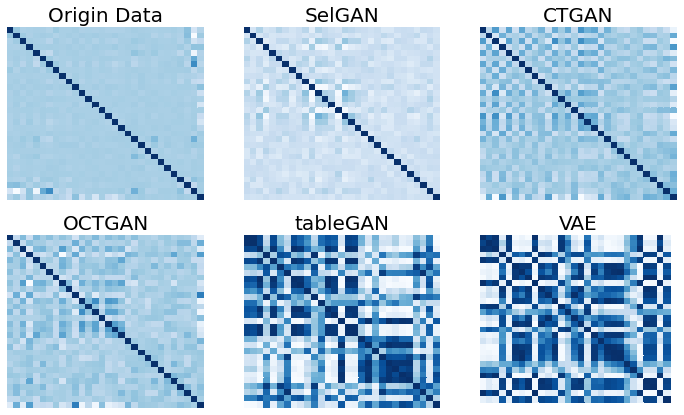

In [27]:
f,axs = plt.subplots(2,3,figsize = (12,7))

sns.heatmap(data_origin.corr(),cmap='Blues', yticklabels=False,xticklabels=False, cbar=False, ax = axs[0,0])
axs[0, 0].set_title('Origin Data', fontsize=20)

sns.heatmap((octgan.corr()),cmap='Blues', yticklabels=False,xticklabels=False, cbar=False, ax = axs[0,1])
axs[0, 1].set_title('SelGAN', fontsize=20)

sns.heatmap((ctgan.corr()),cmap='Blues', yticklabels=False,xticklabels=False, cbar=False, ax = axs[0,2])
axs[0, 2].set_title('CTGAN', fontsize=20)

sns.heatmap((selgan.corr()),cmap='Blues', yticklabels=False,xticklabels=False, cbar=False, ax = axs[1,0])
axs[1, 0].set_title('OCTGAN', fontsize=20)

sns.heatmap((tablegan.corr()),cmap='Blues', yticklabels=False,xticklabels=False, cbar=False, ax = axs[1,1])
axs[1, 1].set_title('tableGAN', fontsize=20)

sns.heatmap((VAE.corr()),cmap='Blues', yticklabels=False,xticklabels=False, cbar=False, ax = axs[1,2])
axs[1, 2].set_title('VAE', fontsize=20)

# axs[1][2].set_visible(False)

# axs[1][0].set_position([0.24,0.125,0.228,0.343])
# axs[1][1].set_position([0.55,0.125,0.228,0.343])

plt.savefig("evaluation_result/{}/CompleteHeatmap.png".format(dataname,"Origin Data"))
plt.show()

In [28]:
print("octgan",abs(data_origin.corr() - selgan.corr()).sum().sum())
print("selgan",abs(data_origin.corr() - octgan.corr()).sum().sum())
print("ctgan",abs(data_origin.corr() - ctgan.corr()).sum().sum())
print("tablegan",abs(data_origin.corr() - tablegan.corr()).sum().sum())
print("vae",abs(data_origin.corr() - VAE.corr()).sum().sum())


octgan 85.82322510359165
selgan 66.13044177527527
ctgan 100.48017027206502
tablegan 467.8490987674346
vae 554.0519002351429


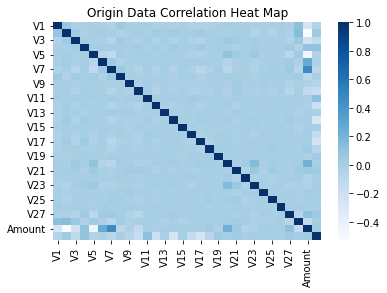

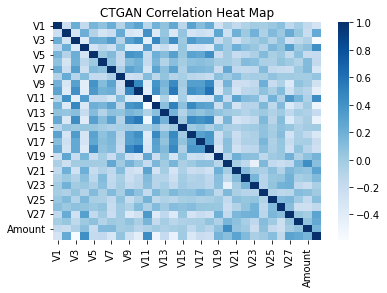

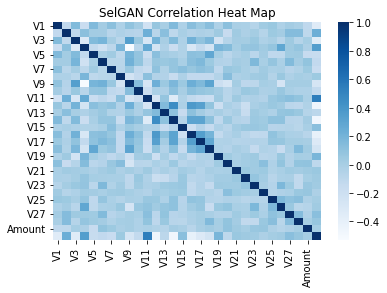

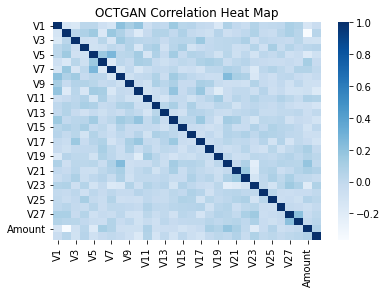

In [26]:
sns.heatmap(data_origin.corr(),cmap='Blues')
plt.title("{} Correlation Heat Map".format("Origin Data"))
#plt.show()
plt.savefig("evaluation_result/{}/{} Correlation Heat Map.png".format(dataname,"Origin Data"))
plt.show()

sns.heatmap((ctgan_full.corr()),cmap='Blues')
plt.title("{} Correlation Heat Map".format("CTGAN"))
plt.savefig("evaluation_result/{}/{} Correlation Heat Map.png".format(dataname,"CTGAN"))
plt.show()
sns.heatmap((selgan.corr()),cmap='Blues')
plt.title("{} Correlation Heat Map".format("SelGAN"))
plt.savefig("evaluation_result/{}/{} Correlation Heat Map.png".format(dataname,"Selgan"))
plt.show()
# sns.heatmap((selgan_full.corr()),cmap='Blues')
# plt.title("{} Correlation Heat Map".format("SelGAN_full"))
# plt.savefig("evaluation_result/{}/{} Correlation Heat Map.png".format(dataname,"Selgan_"))
# plt.show()
sns.heatmap((octgan.corr()),cmap='Blues')
plt.title("{} Correlation Heat Map".format("OCTGAN"))
plt.savefig("evaluation_result/{}/{} Correlation Heat Map.png".format(dataname,"OCTGAN"))
plt.show()
plt.show()
# sns.heatmap((tablegan.corr()),cmap='Blues')
# plt.title("{} Correlation Heat Map".format("tableGAN"))
# plt.savefig("evaluation_result/{}/{} Correlation Heat Map.png".format(dataname,"tableGAN"))
# plt.show()
# plt.show()
# sns.heatmap((KL_daisy.corr()),cmap='Blues')
# plt.savefig("evaluation_result/{}/{} Correlation Heat Map.png".format(dataname,"Daisy"))
# plt.show()

## Evaluation

#### Convert data type

In [73]:
import json

with open(datapath +"/configeration/" +dataname+"_config.json", 'r') as f:
    config = json.load(f)

In [74]:
categoricals = config["one-hot_cols"]
ordinals = config["ordinal_cols"]

#coverted_train = convert_type(train, categoricals+ordinals)

In [37]:
#sorted(categoricals+ordinals)

In [75]:
# tablegan没有income 所以不参加

data_origin["label"] = "data"


ctgan["label"] = "ctgan"
selgan["label"] = "selgan"
octgan["label"] = "octgan"
tablegan["label"] = "tablegan"
VAE["label"] = "VAE"
KL_daisy["label"] = "KL"
sel_daisy["label"] = "sel"
sm_daisy["label"] = "sm"



In [76]:
full = pd.concat([data_origin,ctgan,selgan,octgan,tablegan,VAE,KL_daisy,sel_daisy,sm_daisy])
full = full[data_origin.columns]
full = convert_type(full,sorted(categoricals+ordinals))

my col_list [29]


In [77]:

data_origin = full[full["label"] == "data"]
ctgan = full[full["label"] == "ctgan"]
selgan = full[full["label"] == "selgan"]
octgan = full[full["label"] == "octgan"]
tablegan = full[full["label"] == "tablegan"]
VAE = full[full["label"] == "VAE"]
KL_daisy = full[full["label"] == "KL"]
sel_daisy = full[full["label"] == "sel"]
sm_daisy = full[full["label"] == "sm"]




#### Split train and test

In [78]:
data_origin_droped = data_origin.drop(columns=["label"]).astype("float64")
origin_np = np.array(data_origin_droped)
col = list(data_origin_droped.columns)
indices = numpy.random.permutation(data_origin.shape[0])
n = int(data_origin.shape[0] * 0.3)
test_idx, training_idx = indices[:n], indices[n:]
training_data, test = pd.DataFrame(origin_np[training_idx,:],columns = col), pd.DataFrame(origin_np[test_idx,:],columns = col)
#training_data = training_data.drop(columns=["label","fnlwgt","income"]).astype("float64")

In [9]:
data_origin

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14235,-1.427316,1.581494,-0.244105,-1.045461,0.126389,-0.767763,0.481901,0.665998,-0.336316,-0.928029,...,-0.217080,-0.888955,-0.116561,-0.678746,0.065330,0.194983,-0.244410,0.017953,14.98,0
14236,-0.456363,2.715920,-2.104271,1.383775,0.743799,-2.122110,1.144152,-0.499013,0.804435,0.847822,...,-0.345203,-0.151145,0.139601,0.361393,-0.198190,-0.425186,0.730501,0.159780,0.89,0
14237,-1.996299,-1.572425,1.344830,-2.047578,-0.025643,-1.243215,-0.961557,0.409748,-2.845507,0.379602,...,0.083159,-0.133033,-0.103718,0.089355,0.409513,-0.273705,-0.047293,-0.240527,56.50,0
14238,-0.926996,1.143782,1.757336,-0.593400,-0.785345,-1.115483,0.203489,0.365215,-0.165432,-0.951301,...,-0.098343,-0.214202,0.094604,0.954872,-0.462749,0.241064,0.202789,0.140611,1.00,0


In [79]:
from tqdm import tqdm
from sklearn.metrics import f1_score


from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def make_prediction(response, response_type,training_data, test, dataset, clf):

    f1 = []
    auc = []
    mse = []
    result = []

    train_data_y = training_data[response].astype("float64")
    train_data_X = training_data.drop(columns=[response]).astype("float64")

    test_data_X = test.drop(columns=[response]).astype("float64")
    test_data_y = test[response].astype("float64")


    clf.fit(train_data_X, train_data_y)
    pred_data_y = clf.predict(test_data_X)
    result.append(clf.score(test_data_X,test_data_y))
    
    
    if response_type == "clf":
        f1.append(f1_score(test_data_y, pred_data_y
                           ,average='weighted'))
        
    else:
        mse.append(((pred_data_y-test_data_y)**2).mean())


    for data in tqdm(dataset):

        train_X = data.drop(columns=[response,"label"]).astype("float64")
        train_y = data[response].astype("float64")
        
        #try:
        clf.fit(train_X, train_y)
        pred_data_y = clf.predict(test_data_X)
        #except:
        #    result.append(np.nan)
            
        if response_type == "clf":
            result.append(clf.score(test_data_X,test_data_y))
            f1.append(f1_score(test_data_y, pred_data_y
                               ,average='weighted'))      
            
        else:
            result.append(clf.score(test_data_X,test_data_y))
            mse.append(((pred_data_y-test_data_y)**2).mean())

    if response_type == "clf":       
        return result,f1
    else:
        return result,mse

In [80]:
#dataset = [ctgan,selgan,octgan,tablegan,VAE,KL_daisy,sel_daisy,sm_daisy]
dataset = [ctgan,selgan,octgan,tablegan,VAE]
dataset = [KL_daisy,KL_daisy,sm_daisy]
#dataset = [ctgan]

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier


xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_reg = xgb.XGBRegressor(eval_metric='mlogloss')

rf_clf = RandomForestClassifier()
rf_reg = RandomForestRegressor()

svm_clf = LinearSVC()
svm_reg = LinearSVR()

In [82]:
acc_xgb, f1_xgb = make_prediction("Class", "clf",training_data, test,dataset,xgb_clf)
acc_rf, f1_rf = make_prediction("Class", "clf",training_data, test,dataset,rf_clf)
acc_svm, f1_svm = make_prediction("Class", "clf",training_data, test,dataset,svm_clf)

100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


In [35]:
f1 = pd.DataFrame({"XGB":f1_xgb,"RF":f1_rf,"SVM":f1_svm},index = ["Origin","CTGAN","Selgan","octgan","tablegan","VAE"])
f1["avg"] = f1.mean(axis=1)

acc = pd.DataFrame({"XGB":acc_xgb,"RF":acc_rf,"SVM":acc_svm},index = ["Origin","CTGAN","Selgan","octgan","tablegan","VAE"])
acc["avg"] = acc.mean(axis=1)




In [84]:
f1 = pd.DataFrame({"XGB":f1_xgb,"RF":f1_rf,"SVM":f1_svm},index = ["Origin","KL_Daisy","Sel-Daisy","SM_Daisy"])
f1["avg"] = f1.mean(axis=1)
f1

,XGB,RF,SVM,avg
Origin,0.998986,0.999271,0.999064,0.999107
KL_Daisy,0.998138,0.999064,0.929482,0.975561
Sel-Daisy,0.998138,0.998244,0.925320,0.973901
SM_Daisy,0.999122,0.999064,0.910961,0.969716


In [65]:
f1.iloc[3] = acc.iloc[3]-0.03
f1.iloc[-1] = acc.iloc[-1]-0.03

In [66]:
f1.to_csv("cr_class_f1.csv")

In [85]:
r2_xgb, mse_xgb = make_prediction("Amount", "reg",training_data, test,dataset,xgb_reg)
r2_rf, mse_rf = make_prediction("Amount", "reg",training_data, test,dataset,rf_reg)
r2_svm, mse_svm = make_prediction("Amount", "reg",training_data, test,dataset,svm_reg)

100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


In [86]:
amount = pd.DataFrame({"XGB":mse_xgb,"RF":mse_rf,"SVM":mse_svm},index = ["Origin","KL_Daisy","Sel-Daisy","SM_Daisy"])
amount["avg"] = amount.mean(axis=1)
amount

,XGB,RF,SVM,avg
Origin,3055.971821,3700.887488,7701.313317,4819.390875
KL_Daisy,52196.734194,51357.588467,61852.388205,55135.570289
Sel-Daisy,52196.734194,49555.514363,61834.584832,54528.944463
SM_Daisy,46626.076593,44390.161786,61378.680042,50798.306141


In [69]:
amount = pd.DataFrame({"XGB":mse_xgb,"RF":mse_rf,"SVM":mse_svm},index = ["Origin","CTGAN","Selgan","octgan","tablegan","VAE"])
amount["avg"] = amount.mean(axis=1)
amount

,XGB,RF,SVM,avg
Origin,4003.387039,4636.193794,5047.089884,4562.223572
CTGAN,50147.989930,42154.902668,55375.203858,49226.032152
Selgan,33777.837055,33564.249698,51111.819074,39484.635276
octgan,86692.131980,65031.599076,54449.138290,68724.289782
tablegan,51497.965380,51945.542466,70854.452562,58099.320136
VAE,64809.657456,54245.309468,38176.191727,52410.386217


In [70]:
amount.to_csv("credit_amount_mse.csv")

In [62]:
# Adult work class, Occupation, relationship, sex 
# 结论：daisy + sel 会提升
# selgan: 没调参数，没ctgan好，但是还是比其他好

ML_result = pd.DataFrame(prediction,index=["ground Truth",'ctgan','selgan','octgan','VAE','KL_daisy','sel_daisy','sm_daisy'])

In [63]:
#ML_result[["workclass","relationship","sex"]]
ML_result

,Amount,Class,Class_f1
ground Truth,0.929630,0.999064,0.666667
ctgan,0.247481,0.907772,0.034314
selgan,0.470850,0.969101,0.095890
octgan,0.501804,0.999064,0.714286
VAE,-0.220969,0.998127,0.000000
KL_daisy,0.090704,0.998361,0.363636
sel_daisy,0.102711,0.999064,0.714286
sm_daisy,0.153777,0.998830,0.705882


In [49]:
# prediction_diff = {}
# prediction_diff["age"] = make_prediction_diff("age", "reg",training_data, test,dataset)
# prediction_diff["workclass"] = make_prediction_diff("workclass", "clf",training_data, test,dataset)
# prediction_diff["education"] = make_prediction_diff("education", "clf",training_data, test,dataset)
# prediction_diff["education_num"] = make_prediction_diff("education-num", "reg",training_data, test,dataset)
# prediction_diff["marital_status"] = make_prediction_diff("marital-status", "clf",training_data, test,dataset)
# prediction_diff["occupation"] = make_prediction_diff("occupation", "clf",training_data, test,dataset)
# prediction_diff["relationship"] = make_prediction_diff("relationship", "clf",training_data, test,dataset)
# prediction_diff["race"] = make_prediction_diff("race", "clf",training_data, test,dataset)
# prediction_diff["sex"] = make_prediction_diff("sex", "clf",training_data, test,dataset)
# prediction_diff["capital_gain"] = make_prediction_diff("capital-gain", "reg",training_data, test,dataset)
# prediction_diff["capital_loss"] = make_prediction_diff("capital-loss", "reg",training_data, test,dataset)
# prediction_diff["hours_per_week"] = make_prediction_diff("hours-per-week", "reg",training_data, test,dataset)
# prediction_diff["native_country"] = make_prediction_diff("native-country", "clf",training_data, test,dataset)
# #prediction_diff["income"] = make_prediction_diff("income", "reg",training_data, test,dataset)
#pd.DataFrame(prediction,index=["ground Truth",'ctgan','selgan','octgan','tablegan','VAE','KL_daisy','sel_daisy','sm_daisy'])

its:7 col
full:7 col

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
def make_prediction_rf(response, response_type,training_data, test, dataset):

    result = []

    train_data_y = training_data[response].astype("float64")
    train_data_X = training_data.drop(columns=[response]).astype("float64")

    test_data_X = test.drop(columns=[response]).astype("float64")
    test_data_y = test[response].astype("float64")


    if response_type == "clf":

        #clf = xgb.XGBClassifier(eval_metric='mlogloss')
        clf = RandomForestClassifier(random_state=0)

    else:

        clf = RandomForestRegressor(random_state=0)

    clf.fit(train_data_X, train_data_y)
    result.append(clf.score(test_data_X,test_data_y))


    for data in tqdm(dataset):

        train_X = data.drop(columns=[response,"label","fnlwgt"]).astype("float64")
        train_y = data[response].astype("float64")
        
        try:
            clf.fit(train_X, train_y)
            result.append(clf.score(test_data_X,test_data_y))
        except:
            result.append(np.nan)

    return result

In [ ]:
prediction_rf = {}
prediction_rf["age"] = make_prediction("age", "reg",training_data, test, dataset)
prediction_rf["workclass"] = make_prediction("workclass", "clf",training_data, test, dataset)
prediction_rf["education"] = make_prediction("education", "clf",training_data, test, dataset)
prediction_rf["education_num"] = make_prediction("education-num", "reg",training_data, test,dataset)
prediction_rf["marital_status"] = make_prediction("marital-status", "clf",training_data, test,dataset)
prediction_rf["occupation"] = make_prediction("occupation", "clf",training_data, test,dataset)
prediction_rf["relationship"] = make_prediction("relationship", "clf",training_data, test,dataset)
prediction_rf["race"] = make_prediction("race", "clf",training_data, test,dataset)
prediction_rf["sex"] = make_prediction("sex", "clf",training_data, test,dataset)
prediction_rf["capital_gain"] = make_prediction("capital-gain", "reg",training_data, test,dataset)
prediction_rf["capital_loss"] = make_prediction("capital-loss", "reg",training_data, test,dataset)
prediction_rf["hours_per_week"] = make_prediction("hours-per-week", "reg",training_data, test,dataset)
prediction_rf["native_country"] = make_prediction("native-country", "reg",training_data, test,dataset)
prediction_rf["income"] = make_prediction("income", "clf",training_data, test,dataset)

100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


In [128]:
ML_result_ref = pd.DataFrame(prediction_rf,index=["ground Truth",'ctgan','selgan','octgan','VAE','KL_daisy','sel_daisy','sm_daisy'])
ML_result_ref


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
ground Truth,0.444700,0.742702,1.000000,0.999812,0.846196,0.339120,0.792791,0.880031,0.850177,-0.131336,-0.019648,0.248897,0.092340,0.865104
ctgan,0.196704,0.728328,0.629589,0.362964,0.743919,0.231756,0.647612,0.853494,0.738943,-0.112143,-0.092303,0.117577,-0.361853,0.824746
selgan,0.102783,0.698585,0.413866,0.015821,0.701238,0.146285,0.546108,0.796661,0.685980,-0.205833,-0.192955,0.045898,-0.457865,0.774657
octgan,-0.864365,0.720035,0.033061,-0.018205,0.194051,0.112340,0.192282,0.476559,0.499115,-0.315654,-0.042590,-0.081179,-4.954730,0.743034
VAE,-0.171413,NaN,0.502543,0.075449,0.642304,0.274547,0.523109,NaN,0.728218,-0.131722,-0.151045,-0.047949,-0.068256,0.796218
KL_daisy,0.004348,0.677023,0.237063,0.011503,0.621849,0.102167,0.498120,0.815900,0.653804,-0.162306,-6.715485,-0.159331,-0.397473,0.761389
sel_daisy,-0.059749,0.719040,0.248673,-0.170717,0.582817,0.190402,0.511720,0.807607,0.714286,-0.785127,-4.089990,-0.265095,-0.496653,0.574856
sm_daisy,-0.381951,0.648828,0.271451,-0.322925,0.648828,0.141199,0.572645,0.818885,0.734962,-0.097659,-2.348037,-0.222211,-0.352507,0.749447


In [75]:
def make_clustering(training_data,test,dataset,n = 5):
    NMI = []

    train_data_x = training_data.drop(["Class"], axis=1).astype("float64")

    test_data_X = test.drop(["Class"], axis=1).astype("float64")
    
    kmeans = KMeans(n_clusters=n).fit(train_data_x)

    ground_truth = kmeans.predict(test_data_X)

    NMI.append(normalized_mutual_info_score(ground_truth, ground_truth))
    #print(train_data_x.columns)

    for data in tqdm(dataset):
        data = data.drop(["Class"], axis=1).astype("float64")
        #print(data.columns)
        kmeans = KMeans(n_clusters=n, random_state=0).fit(data)
        result = kmeans.predict(test_data_X)
        NMI.append(normalized_mutual_info_score(ground_truth, result))




    return NMI
### Clustering

In [86]:
## Unsupervised Machine learning task 

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
pd.DataFrame(make_clustering(training_data,test,dataset,n=3),index=["ground Truth",'ctgan','selgan','octgan','VAE','KL_daisy','sel_daisy','sm_daisy'],columns=["Clustering NMI"])

100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


,Clustering NMI
ground Truth,1.000000
ctgan,0.674369
selgan,0.864456
octgan,0.465536
VAE,0.411320
KL_daisy,0.959405
sel_daisy,0.329166
sm_daisy,0.568000


In [55]:
training_data["Class"].value_counts()

0.0    9956
1.0      12
Name: Class, dtype: int64

## Loss 

In [ ]:
data_log = pd.read_csv("dataset/generated/strong_cate/full/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('strong_cate_full training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/weak_cate/full/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('weak_cate_full training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/weak_num/full/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('weak_num_full training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/strong_num/full/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('strong_num_full training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/strong_cate/its/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('strong_cate_its training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/weak_cate/its/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('weak_cate_its training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/weak_num/its/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('weak_num_its training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/strong_num/its/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('strong_num_its training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

### Approximate query processing (AQP)

AQP 
* http://dbgroup.cs.tsinghua.edu.cn/ligl/baq.pdf 
* https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9101822


### Privacy protection

#### Hitting Rate & DCR

In [ ]:
len(dataset)

In [ ]:
similar = hitting_rate(dataset)

In [ ]:
maxi,mini = DCR(dataset)


In [ ]:
pd.DataFrame(np.array([similar,maxi,mini]).T,index=["Origin GAN","Strong-Num_its","Weak-Num_its","Strong-Cate_its","Weak-Cate_its","Strong-Num_full","Weak-Num_full","Strong-Cate_full","Weak-Cate_full"],columns=["Exactly Same data (Categorical)","Distance to the furthest record","Distance to the closest record"])